### Тема. Применение непрерывного вейвлет-преобразования для поиска краев объектов на изображении

In [1]:
m = 4
N = 30
i = 4
omega = (-1. / 6.) + ((2 * i + N) / (4 * (N + 1)))

In [2]:
omega

0.13978494623655915

#### 1. Схемы подразделений

Пусть $s\in\mathbf{N}$ и $\mathbf{Z}^s$ -- целочисленная решетка. Схема подразделения определяется заданной последовательностью $a=\{a_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$. Мы будем предполагать, что $\mathrm{supp} (a) =\{\alpha: a_{\alpha}\ne 0\}$ -- конечное множество. Обозначим $l_{\infty}(\mathbf{Z}^s)$ линейное нормированное пространство ограниченных последовательностей $\lambda=\{\lambda_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$, в котором норма определяется равенством
$$
\|\lambda\|_{\infty} = \sup\limits_{\alpha\in\mathbf{Z}^s} |\lambda_{\alpha}|.
$$
Введем в рассмотрение оператор $\mathrm{S}~:~l_{\infty}(\mathbf{Z}^s)\to l_{\infty}(\mathbf{Z}^s)$, который определим формулой \[1\]
$$
(\mathrm{S}\lambda)_{\alpha}=\sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-2\beta}\lambda_{\beta},~\lambda\in l_{\infty}(\mathbf{Z}^s).
$$

**Определение 1.** Будем говорить, что схема подразделения \[1\]
$$
\lambda^m=\mathrm{S}\lambda^{m-1},~m=1,2,\dots,~\lambda^0=\lambda
$$
сходится для $\lambda\in l_{\infty}(\mathbf{Z}^s)$, если существует непрерывная функция $f_{\lambda}$, определенная на $\mathbf{R}^s$ такая, что
$$
\lim\limits_{m\to +\infty}\left\| f_{\lambda}\left(\frac{\cdot}{2^m}\right)-\lambda^m\right\|_{\infty} = 0.
$$


Мы будем последовательность $\{a_{\alpha}\}_{\alpha\in\mathbf{Z}^s}$ называть **маской подразделения**, а $\mathrm{S}$ -- оператором подразделения \[1\].

Пусть $\alpha=\begin{pmatrix}\alpha_1&\dots &\alpha_s\end{pmatrix}^T\in\mathbf{Z}^s$. Введем в рассмотрение оператор $\mathrm{U}$, который последовательности $\lambda : \mathbf{Z}^s\to\mathbf{R}$ ставит в соответствие последовательность $\mathrm{U}\lambda :\mathbf{Z}^{s}\to \mathbf{R}$, определенную правилом: $(\mathrm{U}\lambda)_{\alpha}=\lambda_{2^{-1}\alpha}$, если все $\alpha_i$ четные и $(\mathrm{U}\lambda)_{\alpha} = 0$, если хотя бы одно из чисел $\alpha_i$ является нечетным. Тогда 
$$
(S\lambda)_{\alpha}=\sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-2\beta}\lambda_{\beta} = \sum\limits_{\beta\in\mathbf{Z}^s} a_{\alpha-\beta}(\mathrm{U}\lambda)_{\beta} = (a*(\mathrm{U}\lambda))_{\alpha}.
$$
Из определения 1 следует, что $f_{\lambda}(2^{-m}\alpha)\approx \lambda_{\alpha}^m$,  где $\alpha\in\mathbf{Z}^s$. Поэтому  получаем следующий алгоритм приближенного нахождения значений предельной функции в узлах сетки $2^{-m}\mathbf{Z}^s$

**Алгоритм** нахождения $f_{\lambda}(2^{-m}\alpha),~~\alpha\in\mathbf{Z}^s$}

**Дано**: последовательность $\lambda$ и маска $a$.

1. Пусть $j=0$ и $\lambda^{0} = \lambda$.

2. Определим последовательность  
$(\mathrm{U}\lambda^{j})_\alpha = \begin{cases} \lambda_{2^{-1}\alpha}^{j},~~\alpha\in\mathbf{Z}^s, ~\text{все}~ \alpha_i~ \text{четные};\\
0,~~\text{существует нечетное}~ \alpha_i. \end{cases}$

3. Определяем последовательность $\lambda^{j+1} = a * \mathrm{U}\lambda^{j}$ и увеличиваем $j$ на 1. Если $j<m$ переходим к шагу 2, иначе $f_{\lambda}(2^{-m}\alpha)\approx \lambda_{\alpha}^m$.

#### 2. Поиск краев объектов на изображении

**Определение 2.**  Под вейвлетом мы будем понимать функцию $\psi \in \mathrm{L}_{1} ({\bf R}^2)\cap\mathrm{L}_{2} ({\bf R}^2)$, удовлетворяющую условию $\int\limits_{\mathbf{R}^2}\psi (\mathrm{x})d\mathrm{x} =0$.

**Определение 3.**  Для функции двух переменных $f(x,y)$ непрерывное вейвлет-преобразование этой функции определим равенством \[2\]
$$
W_s f(x,y) = \iint\limits_{\mathbf{R}^2} f(x-u,y-v)\psi_s(u,v)dudv,~~i=1,2,
$$
где $\psi_s(u,v) = \frac{1}{s^2}\psi\left(\frac{u}{s},\frac{v}{s}\right)$, $i=1,2$.

Мы будем рассматривать специальный класс вейвлет-функций \[2\]
$$
\psi^1(u,v)=\psi(\sqrt{u^2+v^2})\cos\theta,~~\psi^2(u,v)=\psi(\sqrt{u^2+v^2})\sin\theta,
$$
где $\theta$ -- полярный угол точки $(u,v)$, а носитель функции $\psi\in \mathrm{L}_1(\mathbf{R})\cap\mathrm{L}_2(\mathbf{R})$ будем предполагать компактным, содержащемся в $[0;+\infty)$. В этом случае
$$
\iint\limits_{\mathbf{R}^2} \psi^i(u,v)dudv = \int\limits_0^{+\infty} r\psi(r)dr\int\limits_0^{2\pi} k_i(\theta)d\theta = 0,
$$
где $k_1(\theta)=\cos\theta$, $k_2(\theta)=\sin\theta$. Таким образом, обе функции являются вейвлетами.

Пусть
$$
W_s^if(x,y) = \iint\limits_{\mathbf{R}^2} f(x-u,y-v)\psi_s^i(u,v)dudv,~~i=1,2.
$$

#### 2.1. Вычисление $W_sf$

Заметим, что
$$
W_sf(n,m) = \iint\limits_{\mathbf{R}^2} f(u,v) \psi_s(n-u, m-v)dudv = \sum\limits_{k,l}f(k,l) \iint\limits_{[k;k+1]\times[l,l+1]} \psi_s(n-u,m-v)dudv =
$$
$$
=\sum\limits_{k,l}f(k,l) \iint\limits_{[n-k-1;n-k]\times[m-l-1,m-l]} \psi_s(u,v)dudv = \sum\limits_{k,l}f(n-k,m-l) \psi_{k,l}^s,
$$
где
$$
\psi_{k,l}^s = \iint\limits_{[k-1;k]\times[l-1,l]} \psi_s(u,v)dudv\approx \frac{1}{r^2} \sum\limits_{i_1=0}^{r-1}\sum\limits_{i_2=0}^{r-1} \psi_s\left(k-1+\frac{2i_1+1}{2r},l-1+\frac{2i_2+1}{2r}\right),~~r\in\mathbf{N}.
$$

#### 2.2. Алгоритм определения края

**Дано:** Изображение $f$ и порог $R>1$, близкий к 1. Значения $s_1>s_2>\dots>s_J$. Порог $T$.

1. Для $j=1,2,\dots, J$ находим $W_{s_j} f$.

2. Находим точки, для которых $|\nabla W_{s_j}f(x,y)|\geqslant T$, $j=1,2,\dots, J$.

3. Среди найденных на предыдущем шаге точек оставляем те (точки края), которые удовлетворяют условию
$$
\frac{1}{R}\leqslant \frac{|\nabla W_{s_j} f(x,y)|}{|\nabla W_{s_l} f(x,y)|}\leqslant R,~~j,l=1,2,\dots, J.
$$

## Задание

**Задание 1**. В точках $2^{-m}k,~k\in\mathbf{Z},~~m\in\mathbf{N}$ найти значения предельной функции $\psi$ схемы подразделения, в которой дана маска подразделения $a=\{a_{\alpha}\}_{\alpha\in\mathbf{Z}}$ и последовательность $\lambda^0 = \delta_{0,t}$, $t>0$, выбрана так, чтобы $\mathrm{supp}\psi\subset (0;+\infty)$. Построить график предельной функции и, используя кусочно-линейную интерполяцию, написать функцию на языке Python, вычислющую значения предельной функции в произвольной точке $x\in\mathbf{R}$.

**Задание 2**. Найти значения
$$
\psi_{k,l}^{s,i} = \iint\limits_{[k-1;k]\times[l-1,l]} \psi_s^i(u,v)dudv\approx \frac{1}{r^2} \sum\limits_{i_1=0}^{r-1}\sum\limits_{i_2=0}^{r-1} \psi_s^i\left(k-1+\frac{2i_1+1}{2r},l-1+\frac{2i_2+1}{2r}\right),~~r\in\mathbf{N},
$$
где $\psi^1(u,v)=\psi(\sqrt{u^2+v^2})\cos\theta$, $\psi^1(u,v)=\psi(\sqrt{u^2+v^2})\sin\theta$, для $s=2, 4, 8$.

**Задание 3**.  Используя фильтры $\psi_{k,l}^{s,i}$, найденные  в задании 2, реализовать алгоритм поиска краев объектов на изображении. Протестировать алгоритм на заданном изображении, хранящемся в папке DetectEdge.

**Маски**.
Маски можно взять из статьи "The m-Point Approximating Subdivision Scheme", которая в файле
"Схемы m-точечные". Напрмер,

$$a_{\alpha} = \begin{cases} \frac{1}{6}+\omega,~\alpha = -1;\\ \frac{5}{6}-\omega,~\alpha = 0;\\ \frac{5}{6}-\omega,~\alpha = 1;\\ \frac{1}{6} + \omega,~\alpha = 2;\\ 0,~\alpha \not\in\{-1,0,1,2\},\end{cases}
$$

где

$$
\omega = -\frac{1}{6} + \frac{2\cdot k+N}{4 \cdot (N+1)}, ~~ k=1,2,\dots, N\in\mathbf{N}.
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
from scipy import signal
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def Mask(omega):
    b = np.zeros(4)
    b[0] = 1./ 6. + omega
    b[1] = 5./ 6. - omega
    b[2] = 5./ 6. - omega
    b[3] = 1./ 6. + omega
    a = pd.Series(b, index = (-1, 0, 1, 2))
    return a

In [3]:
def psi(x, Lambda, X):
    y = 0
    Y = np.nonzero(X - x > 0)
    if (len(Y[0]) > 1 and len(Y[0]) < len(X) - 1):
        i0 = Y[0][0] - 1
        i1 = Y[0][0]
        y0 = Lambda[i0]
        x0 = X[i0]
        y1 = Lambda[i1]
        x1 = X[i1]
        y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    return y

def psi_1(u, v, Lambda, X):
    c = complex(u, v)
    polar_coordinates = cmath.polar(c)
    y = psi(polar_coordinates[0], Lambda, X) * np.cos(polar_coordinates[1])
    return y

def psi_s_1(u, v, Lambda, X, s):
    y = (1 / (s ** 2)) * psi_1(u / s, v / s, Lambda, X)
    return y

def psi_2(u, v, Lambda, X):
    c = complex(u, v)
    polar_coordinates = cmath.polar(c)
    y = psi(polar_coordinates[0], Lambda, X) * np.sin(polar_coordinates[1])
    return y

def psi_s_2(u, v, Lambda, X, s):
    y = (1 / (s ** 2)) * psi_2(u / s, v / s, Lambda, X)
    return y

#### Построение функции с компактным носителем, содержащемся в $(0;+\infty)$

Пусть $\lambda_{0,\alpha} = \{\delta_{\alpha,k}\}_{k\in\mathbf{Z}}$  и $\psi_{\alpha}$ -- функция, полученная по схеме подразделения, с маской $a=\{a_k\}_{k\in\mathbf{Z}}$, причем $\mathrm{supp} a=[\Gamma;\Delta ]\cap \mathbf{Z}$ . Тогда

$$
\mathrm{supp}~\lambda_{J,\alpha}\subset \left[2^J \alpha + (2^J-1)\cdot\Gamma; 2^J \alpha + (2^J - 1)\cdot \Delta\right].
$$
Отсюда и из приближенного равенства $\psi_{\alpha}(2^{-J}k)\approx \lambda_{J,k}$ следует, что $\mathrm{supp} \psi_{\alpha} \subset \left[\alpha+\Gamma; \alpha+\Delta\right]$.

In [4]:
def Subdivision(m, a):
    ''' Схема стационарного подразделения с маской a '''
    supp_a = np.array(a.index)
    t = -np.min(supp_a)
    Lambda = pd.Series(0, index = np.arange(t + np.min(supp_a) - len(supp_a) - 1,
                                            t + np.max(supp_a) + len(supp_a) + 2, 1))
    X = Lambda.index
    Lambda.loc[2 * t] = 1 # Здесь уже применен оператор U. После свертки получим \lambda_1
    Lambda = Lambda.values
    a = a.values
    j = 1
    Lambda = signal.convolve(Lambda, a, mode='same')
    T = Lambda
    for s in range(1, m + 1, 1):
        Lambda = np.zeros(2 * T.shape[0])
        Lambda[::2] = T[:]
        I = np.zeros(2 * len(X))
        I[::2] = 2 * X[:]
        I[1::2] = I[::2] + 1
        X = I
        T = signal.convolve(Lambda, a, mode='same')
        j += 1
    Lambda = T[:]
    r = np.nonzero(np.abs(Lambda) > 0)
    i0 = np.max([0, np.min(r[0]) - 1])
    i1 = np.min([len(Lambda) - 1, np.max(r[0]) + 1])
    Lambda = Lambda[i0:(i1 + 1)]
    X = X[i0:(i1 + 1)]
    return [Lambda, (X / pow(2, j))]

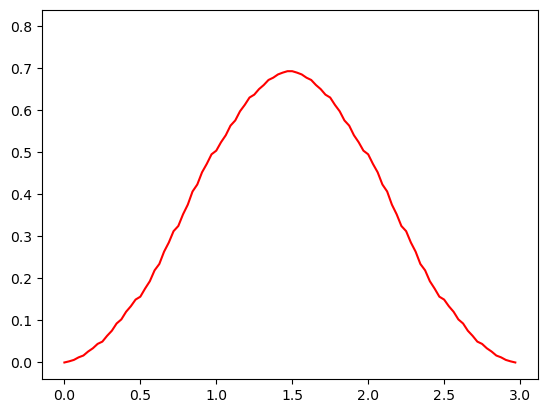

In [5]:
m = 4
N = 30
i = 4
omega = (-1. / 6.) + ((2 * i + N) / (4 * (N + 1)))
a = Mask(omega)
Lambda, X = Subdivision(m, a)
fig = plt.figure()
plt.plot(X, Lambda, '-r', 0.8)

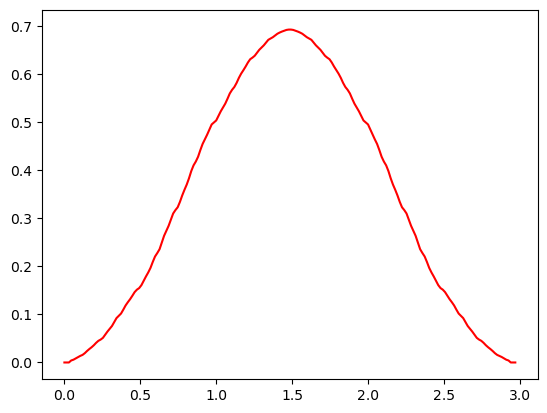

In [6]:
x_min = np.min(X)
x_max = np.max(X)
N = 200
h = 1. / (N - 1)
XL = x_min + (x_max - x_min) * np.arange(N) / (N - 1)
YL = np.zeros(XL.shape)
for i in range(N):
    YL[i] = psi(XL[i], Lambda, X)
fig = plt.figure()
plt.plot(XL, YL, '-r', 0.7)

In [7]:
U = np.zeros((N, N))
V = np.zeros((N, N))
Z = np.zeros((N, N))
s = 8
for i in range(N):
    for k in range(N):
        U[i, k] = -x_max * s + 2 * x_max * s * i / (N - 1)
        V[i, k] = -x_max * s + 2 * x_max * s * k / (N - 1)
        Z[i, k] = psi_s_1(U[i, k], V[i, k], Lambda, X, s)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(U, V, Z)

<Figure size 640x480 with 0 Axes>

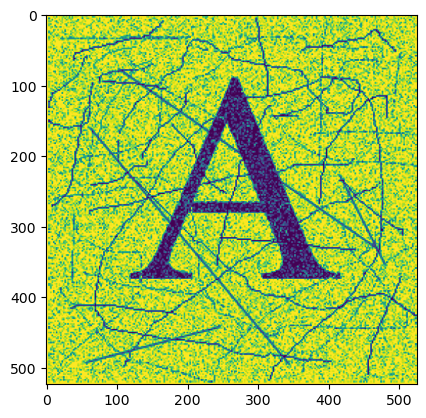

In [8]:
f = np.array(Image.open('DetectEdge\A.png').convert('L'))
fig = plt.figure()
plt.imshow(Image.fromarray(f))
fig.savefig('ExChina.eps')

In [9]:
''' Реализация нахождения фильтров
    для s = 2, 4, 8
'''
def LinInt(x, X, Y):
    if x < X[1]:
        y = 0
    elif x > X[len(X)-2]:
        y = 0
    else:
        i = np.where(X > x)[0]
        a = (Y[i[0]] - Y[i[-1]]) / (X[i[0]] - X[i[-1]])
        b = Y[i[0]] - a * X[i[0]]
        y = a * x + b
    return y
    pass

K = f.shape[1]
L = f.shape[0]

def psi(s, i, K, L):
    r = 4 # k-1,k * l-1,l
    psi_s_i = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            for i0 in range(0, r-1, 1):
                for i1 in range(0, r-1, 1):
                    u = k - 1 + (2 * i0 + 1) / 2 / r
                    v = l - 1 + (2 * i1 + 1) / 2 / r
                    argum = math.sqrt(u ** 2 + v ** 2)
                    sin_teta = v / argum
                    cos_teta = u / argum
                    argum = math.sqrt((u / s) ** 2 + (v / s) ** 2)
                    psi = LinInt(argum, X, Lambda)
                    if i == 1:
                        psi_s_i[k,l] = (psi_s_i[k,l] + psi * cos_teta)
                    elif i == 2:
                        psi_s_i[k,l] = (psi_s_i[k,l] + psi * sin_teta)
    return psi_s_i / s ** 2
    pass

filter_psi_1_2 = psi(2, 1, K, L)
print('2, 1')
filter_psi_2_2 = psi(2, 2, K, L)
print('2, 2')

#plt.imshow(filter_psi_1_2, cmap='gray')
#plt.show()

filter_psi_1_4 = psi(4, 1, K, L)
print('4, 1')
filter_psi_2_4 = psi(4, 2, K, L)
print('4, 2')

#plt.imshow(filter_psi_1_4, cmap='gray')
#plt.show()

filter_psi_1_8 = psi(8, 1, K, L)
print('8, 1')
filter_psi_2_8 = psi(8, 2, K, L)
print('8, 2')

#plt.imshow(filter_psi_1_8, cmap='gray')
#plt.show()

2, 1
2, 2
4, 1
4, 2
8, 1
8, 2


W 2, 1
W 2, 2
W 4, 1
W 4, 2
W 8, 1
W 8, 2


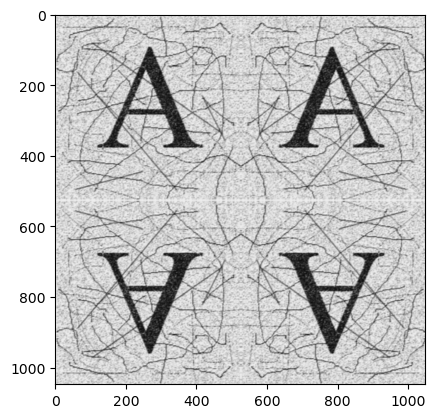

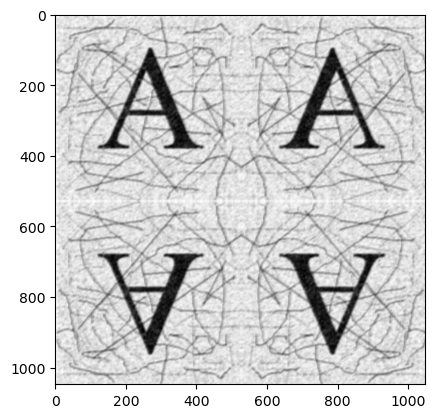

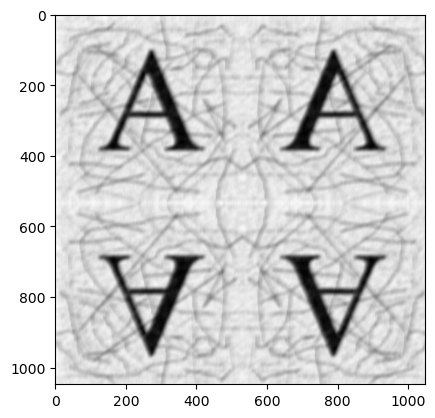

M 2
M 4
M 8


In [10]:
'''
Ws_1_2f = signal.convolve2d(f, filter_psi_1_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_2f = signal.convolve2d(f, filter_psi_2_2.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_4f = signal.convolve2d(f, filter_psi_1_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_4f = signal.convolve2d(f, filter_psi_2_4.values, mode='same', boundary='fill', fillvalue=0)
Ws_1_8f = signal.convolve2d(f, filter_psi_1_8.values, mode='same', boundary='fill', fillvalue=0)
Ws_2_8f = signal.convolve2d(f, filter_psi_2_8.values, mode='same', boundary='fill', fillvalue=0)

Ms2 = np.sqrt((Ws_1_2f ** 2) + (Ws_2_2f ** 2))
Ms4 = np.sqrt((Ws_1_4f ** 2) + (Ws_2_4f ** 2))
Ms8 = np.sqrt((Ws_1_8f ** 2) + (Ws_2_8f ** 2))
'''
W_2_1 = signal.convolve2d(f, filter_psi_1_2, mode='full', boundary='symm', fillvalue = 0)
print('W 2, 1')
W_2_2 = signal.convolve2d(f, filter_psi_2_2, mode='full', boundary='symm', fillvalue = 0)
print('W 2, 2')
W_4_1 = signal.convolve2d(f, filter_psi_1_4, mode='full', boundary='symm', fillvalue = 0)
print('W 4, 1')
W_4_2 = signal.convolve2d(f, filter_psi_2_4, mode='full', boundary='symm', fillvalue = 0)
print('W 4, 2')
W_8_1 = signal.convolve2d(f, filter_psi_1_8, mode='full', boundary='symm', fillvalue = 0)
print('W 8, 1')
W_8_2 = signal.convolve2d(f, filter_psi_2_8, mode='full', boundary='symm', fillvalue = 0)
print('W 8, 2')

plt.imshow(W_2_1, cmap='gray')
plt.show()

plt.imshow(W_4_1, cmap='gray')
plt.show()

plt.imshow(W_8_1, cmap='gray')
plt.show()

def M_s(K, L, W_1, W_2):
    M = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            M[k,l] = math.sqrt(W_1[k,l] ** 2 + W_2[k,l] ** 2)
    return M
    pass

M_2 = M_s(K, L, W_2_1, W_2_2)
print('M 2')

M_4 = M_s(K, L, W_4_1, W_4_2)
print('M 4')

M_8 = M_s(K, L, W_8_1, W_8_2)
print('M 8')

# Нормировка
M_2 = M_2 / M_2.max()
M_4 = M_4 / M_4.max()
M_8 = M_8 / M_8.max()

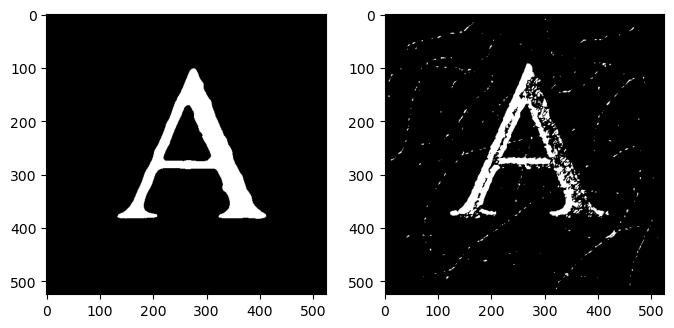

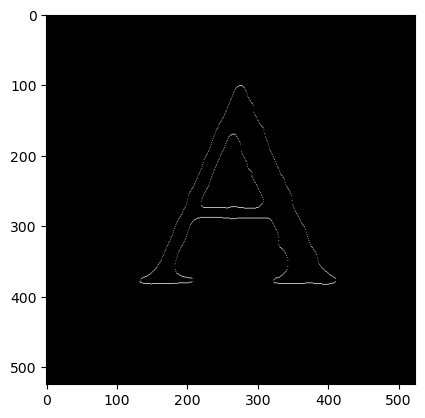

In [214]:
''' Результат'''
'''
def contours(M_2, M_4, M_8, R):
    # R = 1.1
    img = np.zeros([K,L])
    for l in range(0, L-1, 1):
        for k in range(0, K-1, 1):
            if ((M_2[k,l] / M_4[k,l]) > R and (M_4[k,l] / M_8[k,l]) > R) \
            and ((M_2[k,l] / M_4[k,l]) > (1 / R)) and ((M_4[k,l] / M_8[k,l]) > (1 / R)):
                img[k,l] = 255
            else:
                img[k,l] = 0
    return img
    pass
M_2 = M_2 * 255
M_4 = M_4 * 255
M_8 = M_8 * 255
'''
def M_s(K, L, W_1, W_2):
    M = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            M[k,l] = math.sqrt(W_1[k,l] ** 2 + W_2[k,l] ** 2)
    return M
    pass

M_2 = M_s(K, L, W_2_1, W_2_2)
M_4 = M_s(K, L, W_4_1, W_4_2)
M_8 = M_s(K, L, W_8_1, W_8_2)

# Нормировка
M_2 = M_2 / M_2.max()
M_4 = M_4 / M_4.max()
M_8 = M_8 / M_8.max() 

def contours(M_2, M_4, M_8, R):
    img = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if not((1 / R) <= (M_2[k,l] / M_4[k,l]) <= R ) or \
            not((1 / R) <= (M_4[k,l] / M_8[k,l]) <= R):
                img[k,l] = 255
            else:
                img[k,l] = 0
    return img
    pass

def edge(img):
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if (img[l, k] - img[l-1, k]) != 0:
                img[l-1, k] = 255
            else:
                img[l-1, k] = 0
    return img
    pass

'''
def contours(M_2, M_4, M_8, R):
    img = np.zeros([K,L])
    for k in range(0, K-1, 1):
        for l in range(0, L-1, 1):
            if ((1 / R) < (M_2[k,l] / M_4[k,l]) < R ) and \
            ((1 / R) < (M_4[k,l] / M_8[k,l]) < R):
                img[k,l] = 0
            else:
                img[k,l] = 255
    return img
    pass
'''
'''
plt.imshow(M_2, cmap='gray')
plt.show()

plt.imshow(M_4, cmap='gray')
plt.show()

plt.imshow(M_8, cmap='gray')
plt.show()


plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_contours, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(img - img_contours, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow((img_contours - img), cmap='gray')
plt.show()
'''
T = 0.5
R = 0.93
img_contours = contours(M_2, M_4, M_8, 1.7)
img = np.where(M_2 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_4 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_8 > T, 0, contours(M_2, M_4, M_8, R)) #contours(M_2, M_4, M_8, R)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_contours, cmap='gray')
plt.show()

plt.imshow(edge(img), cmap='gray')
plt.show()

### Литература

1. A. S. Cavaretta, W. Dahmen, and C. A. Micchelli, Stationary Subdivision Schemes, Mem. Amer. Math. Soc. 93, 1-186.

2. Y.Y. Tang, L.H. Yang, J. Liu, H.Ma Wavelet theory and its application to pattern recognition. World Scientific Publishing Co. Pte. Ltd. 2000, 344 pp.

# Тесты

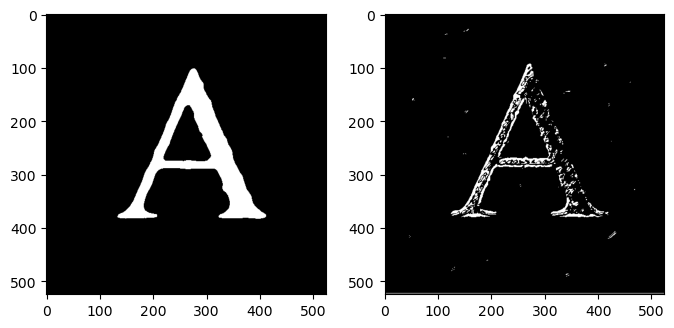

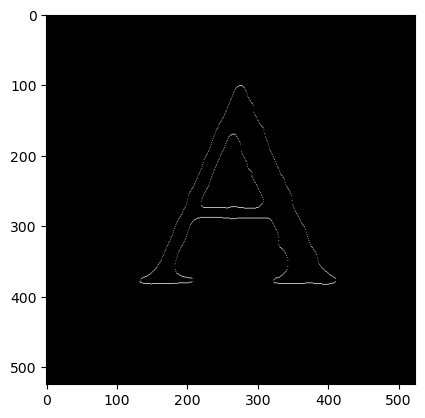

In [222]:
def M_s(K, L, W_1, W_2):
    M = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            M[k,l] = math.sqrt(W_1[k,l] ** 2 + W_2[k,l] ** 2)
    return M
    pass

M_2 = M_s(K, L, W_2_1, W_2_2)
M_4 = M_s(K, L, W_4_1, W_4_2)
M_8 = M_s(K, L, W_8_1, W_8_2)

# Нормировка
M_2 = M_2 / M_2.max()
M_4 = M_4 / M_4.max()
M_8 = M_8 / M_8.max() 

def contours(M_2, M_4, M_8, R):
    img = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if not((1 / R) < (M_2[k,l] / M_4[k,l]) < R ) and \
            not((1 / R) < (M_4[k,l] / M_8[k,l]) < R):
          # not((1 / R) < (M_2[k,l] / M_8[k,l]) < R ) and \
                img[k,l] = 255
            else:
                img[k,l] = 0
    return img
    pass

def edge(img):
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if (img[l, k] - img[l-1, k]) != 0:
                img[l-1, k] = 255
                img[l, k] 
            else:
                img[l-1, k] = 0
    return img
    pass

T = 0.5
R = 0.995
img_contours = contours(M_2, M_4, M_8, 1.5)
img = np.where(M_2 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_4 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_8 > T, 0, contours(M_2, M_4, M_8, R)) #contours(M_2, M_4, M_8, R)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_contours, cmap='gray')
plt.show()

plt.imshow(edge(img), cmap='gray')
plt.show()

plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.imshow(W_2_1, cmap='gray')
plt.subplot(3, 2, 2)
plt.imshow(W_2_2, cmap='gray')
plt.subplot(3, 2, 3)
plt.imshow(W_4_1, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(W_4_2, cmap='gray')
plt.subplot(3, 2, 5)
plt.imshow(W_8_1, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(W_8_2, cmap='gray')
plt.show()

In [206]:
M_2 = np.sqrt(W_2_1**2 + W_2_2**2)
M_4 = np.sqrt(W_4_1**2 + W_4_2**2)
M_8 = np.sqrt(W_8_1**2 + W_8_2**2)

# Нормировка
M_2 = M_2 / M_2.max()
M_4 = M_4 / M_4.max()
M_8 = M_8 / M_8.max() 

In [207]:
def contours(M_2, M_4, M_8, R):
    img = np.zeros([K,L])
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if not((1 / R) <= (M_2[k,l] / M_4[k,l]) <= R ) or \
            not((1 / R) <= (M_4[k,l] / M_8[k,l]) <= R):
                img[k,l] = 255
            else:
                img[k,l] = 0
    return img
    pass
def edge(img):
    for k in range(0, K - 1, 1):
        for l in range(0, L - 1, 1):
            if (img[l, k] - img[l-1, k]) != 0:
                img[l-1, k] = 255
            else:
                img[l-1, k] = 0
    return img
    pass

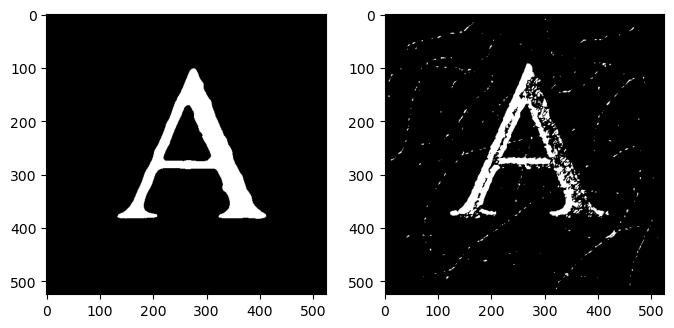

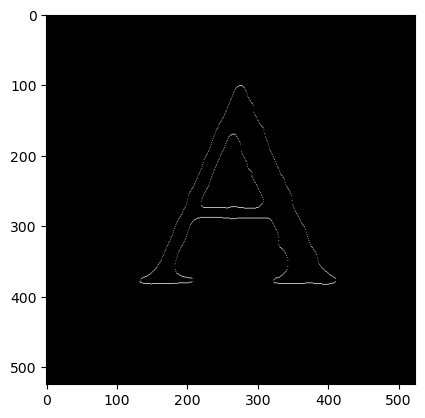

In [218]:
T = 0.5
R = 0.93
img_contours = contours(M_2, M_4, M_8, 1.7)
img = np.where(M_2 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_4 > T, 0, contours(M_2, M_4, M_8, R))
img = np.where(M_8 > T, 0, contours(M_2, M_4, M_8, R)) #contours(M_2, M_4, M_8, R)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_contours, cmap='gray')
plt.show()

plt.imshow(edge(img), cmap='gray')
plt.show()